In [ ]:
# Task 6: K-Nearest Neighbors (KNN) Classification

In [ ]:
#  1.Choose a classification dataset and normalize features.

In [ ]:
# importing library

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# loading dataset

In [53]:
df=pd.read_csv("C:/Users/HP/Downloads/archive (4)/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [54]:
# exploring data info

In [55]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
df.shape

(150, 6)

In [57]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [59]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [60]:
df.isna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [61]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [62]:
#  selecting the features and target columns

In [63]:
from sklearn.model_selection import train_test_split

In [212]:
X=df[["SepalWidthCm","SepalLengthCm","PetalLengthCm","PetalWidthCm"]]
X

,SepalWidthCm,SepalLengthCm,PetalLengthCm,PetalWidthCm
0,3.5,5.1,1.4,0.2
1,3.0,4.9,1.4,0.2
2,3.2,4.7,1.3,0.2
3,3.1,4.6,1.5,0.2
4,3.6,5.0,1.4,0.2
...,...,...,...,...
145,3.0,6.7,5.2,2.3
146,2.5,6.3,5.0,1.9
147,3.0,6.5,5.2,2.0
148,3.4,6.2,5.4,2.3


In [213]:
y_vis=df["Species"]
y_vis

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [214]:
# splitting the dataset

In [215]:
from sklearn.preprocessing import StandardScaler

In [216]:
X_train,X_test,y_train,y_test=train_test_split(X,y_vis,test_size=0.2,random_state=42)

In [217]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [218]:
# Normalize the features to [0, 1] using MinMaxScaler

In [219]:
from sklearn.preprocessing import MinMaxScaler

In [220]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [221]:
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

In [222]:
df_normalized = pd.concat([X_normalized_df, y_vis], axis=1)

In [223]:
print(df_normalized.head())

   SepalWidthCm  SepalLengthCm  PetalLengthCm  PetalWidthCm      Species
0      0.625000       0.222222       0.067797      0.041667  Iris-setosa
1      0.416667       0.166667       0.067797      0.041667  Iris-setosa
2      0.500000       0.111111       0.050847      0.041667  Iris-setosa
3      0.458333       0.083333       0.084746      0.041667  Iris-setosa
4      0.666667       0.194444       0.067797      0.041667  Iris-setosa


In [224]:
# 2.Use KNeighborsClassifier from sklearn.

In [225]:
# importing library

In [226]:
from sklearn.neighbors import KNeighborsClassifier

In [227]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [228]:
y_pred = knn.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [229]:
# evaluation metrics

In [230]:
# importing library

In [231]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [232]:
knn.score(X_test,y_test)

0.9666666666666667

In [233]:
print("accuracy:",accuracy_score(y_test,y_pred)*100)

accuracy: 96.66666666666667


In [234]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

In [235]:
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [236]:
# 3.Experiment with different values of K.

In [237]:
#  Testing different values of K

In [238]:
k_values = range(1, 21)
accuracies = []

In [239]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} → Accuracy: {acc:.2f}")

K=1 → Accuracy: 0.97
K=2 → Accuracy: 0.93
K=3 → Accuracy: 0.97
K=4 → Accuracy: 0.93
K=5 → Accuracy: 0.97
K=6 → Accuracy: 0.93
K=7 → Accuracy: 0.97
K=8 → Accuracy: 0.97
K=9 → Accuracy: 0.97
K=10 → Accuracy: 0.97
K=11 → Accuracy: 0.97
K=12 → Accuracy: 0.97
K=13 → Accuracy: 0.97
K=14 → Accuracy: 0.97
K=15 → Accuracy: 0.97
K=16 → Accuracy: 0.97
K=17 → Accuracy: 0.97
K=18 → Accuracy: 0.97
K=19 → Accuracy: 0.97
K=20 → Accuracy: 0.97


In [240]:
#  Plotting

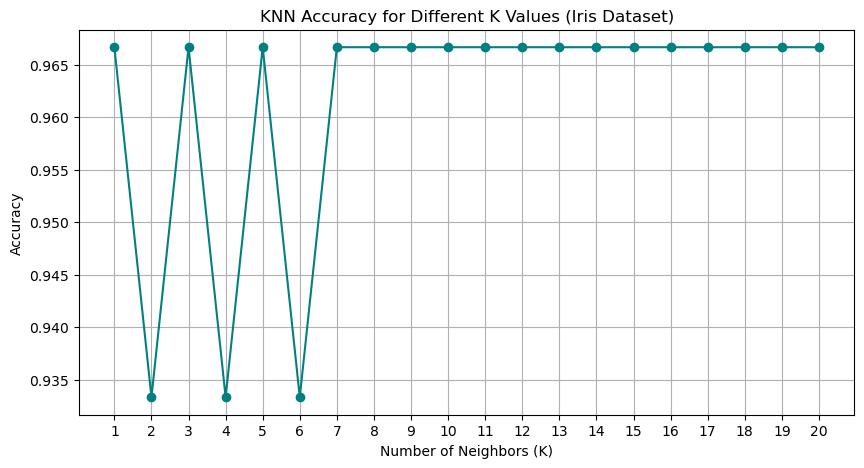

In [241]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='teal')
plt.title("KNN Accuracy for Different K Values (Iris Dataset)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [242]:
#  4.Evaluate model using accuracy, confusion matrix.

In [243]:
# accuracy

In [244]:
print("accuracy:",accuracy_score(y_test,y_pred)*100)

accuracy: 96.66666666666667


In [245]:
# confusion matrix

In [246]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

In [247]:
# 5.Visualize decision boundaries.

In [248]:
# training

In [249]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y_vis)

KNeighborsClassifier()

In [250]:
X_scaled = scaler.fit_transform(X) 
x_min, x_max = X_scaled[:, 0].min() - 0.1, X_scaled[:, 0].max() + 0.1

In [251]:
# Creating meshgrid for plotting decision regions

In [252]:
x_min, x_max = X_scaled[:, 0].min() - 0.1, X_scaled[:, 0].max() + 0.1
y_min, y_max = X_scaled[:, 1].min() - 0.1, X_scaled[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]

In [253]:
Z = knn.predict(grid_points).reshape(xx.shape)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but KNeighborsClassifier is expecting 4 features as input.

In [254]:
# plotting

In [255]:
from sklearn.preprocessing import LabelEncoder

In [256]:
le = LabelEncoder()
y_vis_encoded = le.fit_transform(y_vis)

In [275]:
le = LabelEncoder()
le.fit(y_vis)  # Fit on your training labels
Z_num = le.transform(Z)

In [276]:
Z_num = Z_num.reshape(xx.shape)

In [277]:
print(f"x_min={x_min}, x_max={x_max}")
print(f"y_min={y_min}, y_max={y_max}")

x_min=-2.5687352207168406, x_max=2.7863413146490474
y_min=-2.444449697279519, y_max=2.7109015831854495


In [278]:
print(np.unique(Z_num))

[0 1]


In [279]:
X_vis = X_scaled[:, [0, 1]] 
y_vis = y 

In [280]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]

In [281]:
from sklearn.preprocessing import StandardScaler

In [282]:
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


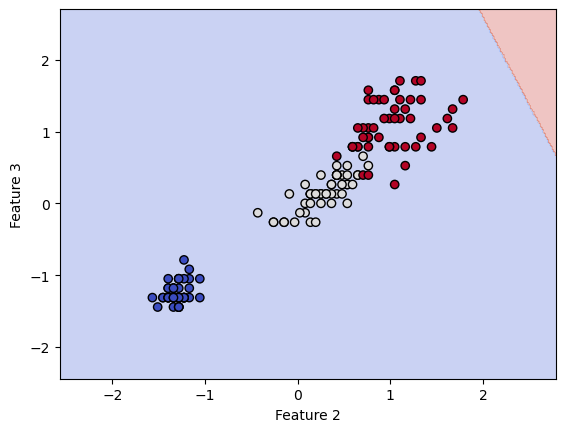

In [283]:
feat1, feat2 = 2, 3
x_min, x_max = X_all_scaled[:, feat1].min() - 1, X_all_scaled[:, feat1].max() + 1
y_min, y_max = X_all_scaled[:, feat2].min() - 1, X_all_scaled[:, feat2].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

grid_points = np.zeros((xx.ravel().shape[0], 4))
grid_points[:, feat1] = xx.ravel()
grid_points[:, feat2] = yy.ravel()

# Fix other two features (0 and 1) to mean values
grid_points[:, 0] = X_all_scaled[:, 0].mean()
grid_points[:, 1] = X_all_scaled[:, 1].mean()

Z = knn.predict(grid_points)
Z_num = le.transform(Z)
Z_num = Z_num.reshape(xx.shape)

plt.contourf(xx, yy, Z_num, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_all_scaled[:, feat1], X_all_scaled[:, feat2], c=le.transform(y), edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel(f"Feature {feat1}")
plt.ylabel(f"Feature {feat2}")
plt.show()


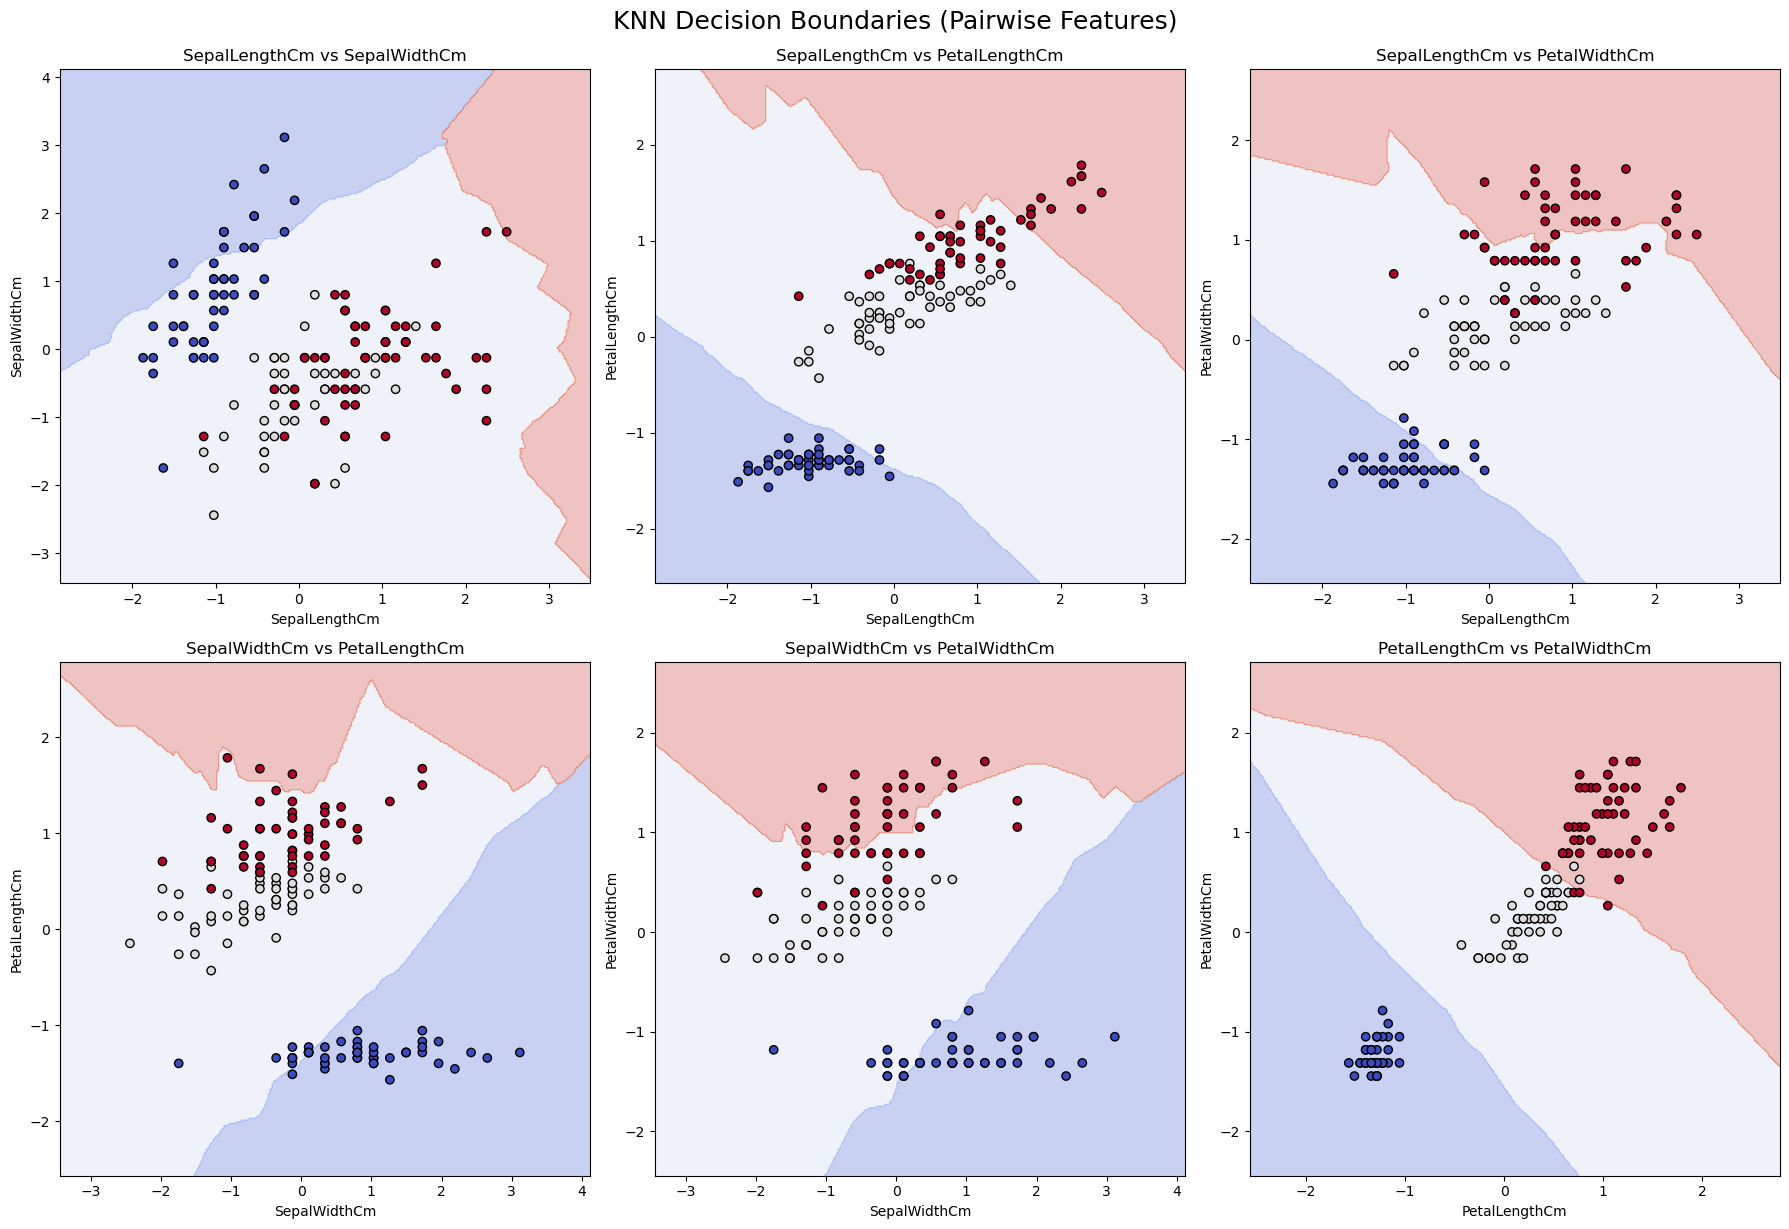

In [284]:
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_cols].values
y = df['Species'].astype('category').cat.codes  # Convert to numeric if not already
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)

# Plot decision boundaries for feature pairs
pairs = [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)]

plt.figure(figsize=(18, 12))
for idx, (i, j) in enumerate(pairs):
    plt.subplot(2, 3, idx + 1)

    x_min, x_max = X_scaled[:, i].min() - 1, X_scaled[:, i].max() + 1
    y_min, y_max = X_scaled[:, j].min() - 1, X_scaled[:, j].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    grid = np.c_[xx.ravel(), yy.ravel()]
    X_full = np.zeros((grid.shape[0], 4))
    X_full[:, i] = grid[:, 0]
    X_full[:, j] = grid[:, 1]

    Z = knn.predict(X_full).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_scaled[:, i], X_scaled[:, j], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel(feature_cols[i])
    plt.ylabel(feature_cols[j])
    plt.title(f"{feature_cols[i]} vs {feature_cols[j]}")

plt.tight_layout()
plt.suptitle("KNN Decision Boundaries (Pairwise Features)", fontsize=18, y=1.02)
plt.show()
